## Insights from homeworkout data

During the journey to physical fitness, I have been collecting heart rate and calory burning data for [Barry's Bootcamp](https://www.barrys.com/) high intensity interval training classes. The goal is to better understand:

- How heart rate correlates with calories burn?
- Which type of workout is more effective, weights, bands, or body weight?
- Does full-body workout burn more calories compared with body part focused workout?

In [196]:
# load packages 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.image as mpimg
import seaborn as sns
import scipy.stats as stats
from matplotlib.axes._axes import _log as matplotlib_axes_logger

# load data
df = pd.read_excel('home_workout.xlsx', sheet_name=0)
print('Total number of workouts: {}'.format(df.shape[0]))
# top 3 and last 2 records
print('First 3 and last 2 workout data:')
pd.concat([df.head(3), df.tail(2)])

Total number of workouts: 185
First 3 and last 2 workout data:


,Date,DayOfWeek,Class,Instructor,ClassType,ClassTime,Duration,Calories_Active,Calories_Total,Heart_Rate_Avg,Heart_Rate_Min,Heart_Rate_Max,Heart_Rate_Image
0,2020-04-13,Mon,Arms & Abs,Meghan S,Weights,08:30:00,33,148,192,127,102,148,04_13_2020_1.png
1,2020-04-13,Mon,Arms & Abs,Isaiah H,Body Weight,17:00:00,33,149,192,129,107,154,04_13_2020_2.png
2,2020-04-14,Tue,Full Body (Lower Focus),Joe N,Weights,17:30:00,36,163,212,126,84,170,04_14_2020_1.png
183,2020-08-08,Sat,Full Body (Upper Focus),Tommy Luke,Weights,11:00:00,48,229,284,136,99,169,08_08_2020_1.png
184,2020-08-09,Sun,Total Body,Tony Forte,Bands,15:45:00,42,217,266,142,104,168,08_09_2020_1.png


### How heart rate correlates with calories burn?

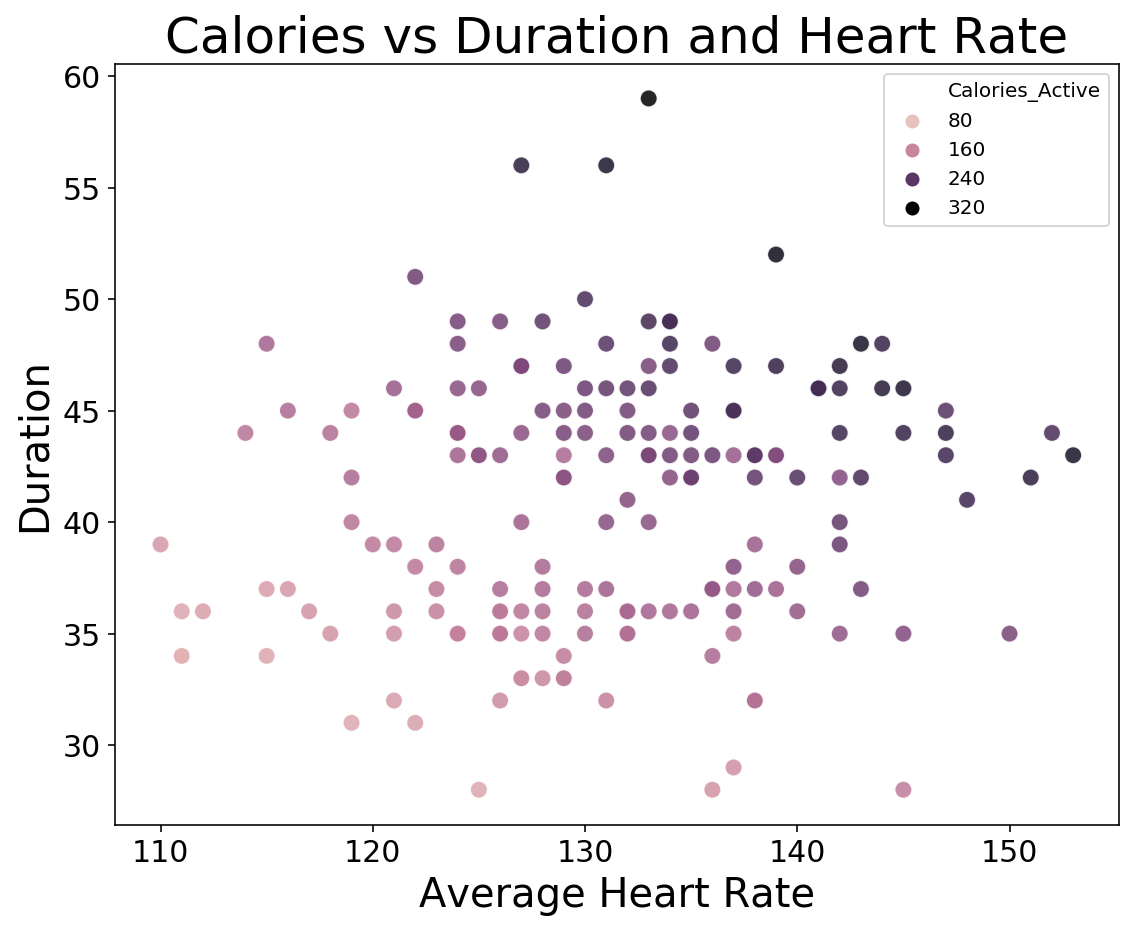

In [197]:
plt.figure(figsize=(9,7))
cmap = sns.cubehelix_palette(dark=0.0, light=.8, as_cmap=True)
sns.scatterplot(x="Heart_Rate_Avg", y="Duration", 
                hue="Calories_Active",
                s=75, alpha=0.85, data=df, palette=cmap)
plt.title('Calories vs Duration and Heart Rate', fontsize=25)
plt.xlabel('Average Heart Rate', fontsize=20, rotation=0)
plt.ylabel('Duration', fontsize=20, rotation=90)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0);
plt.legend(loc='upper right')
plt.show()

Barry's Bootcamp increased the class duration from 30 minute to 45 minute (without charging extra). For the same type of workout, longer duration leads to higher calorie burn. Thus calorie burn is normalized to 50 min to reduce the variability of workout duration.

In [198]:
# normalize calories to 50 min workout
df['Calories_Active_50min'] = df['Calories_Active'] / df['Duration'] * 50

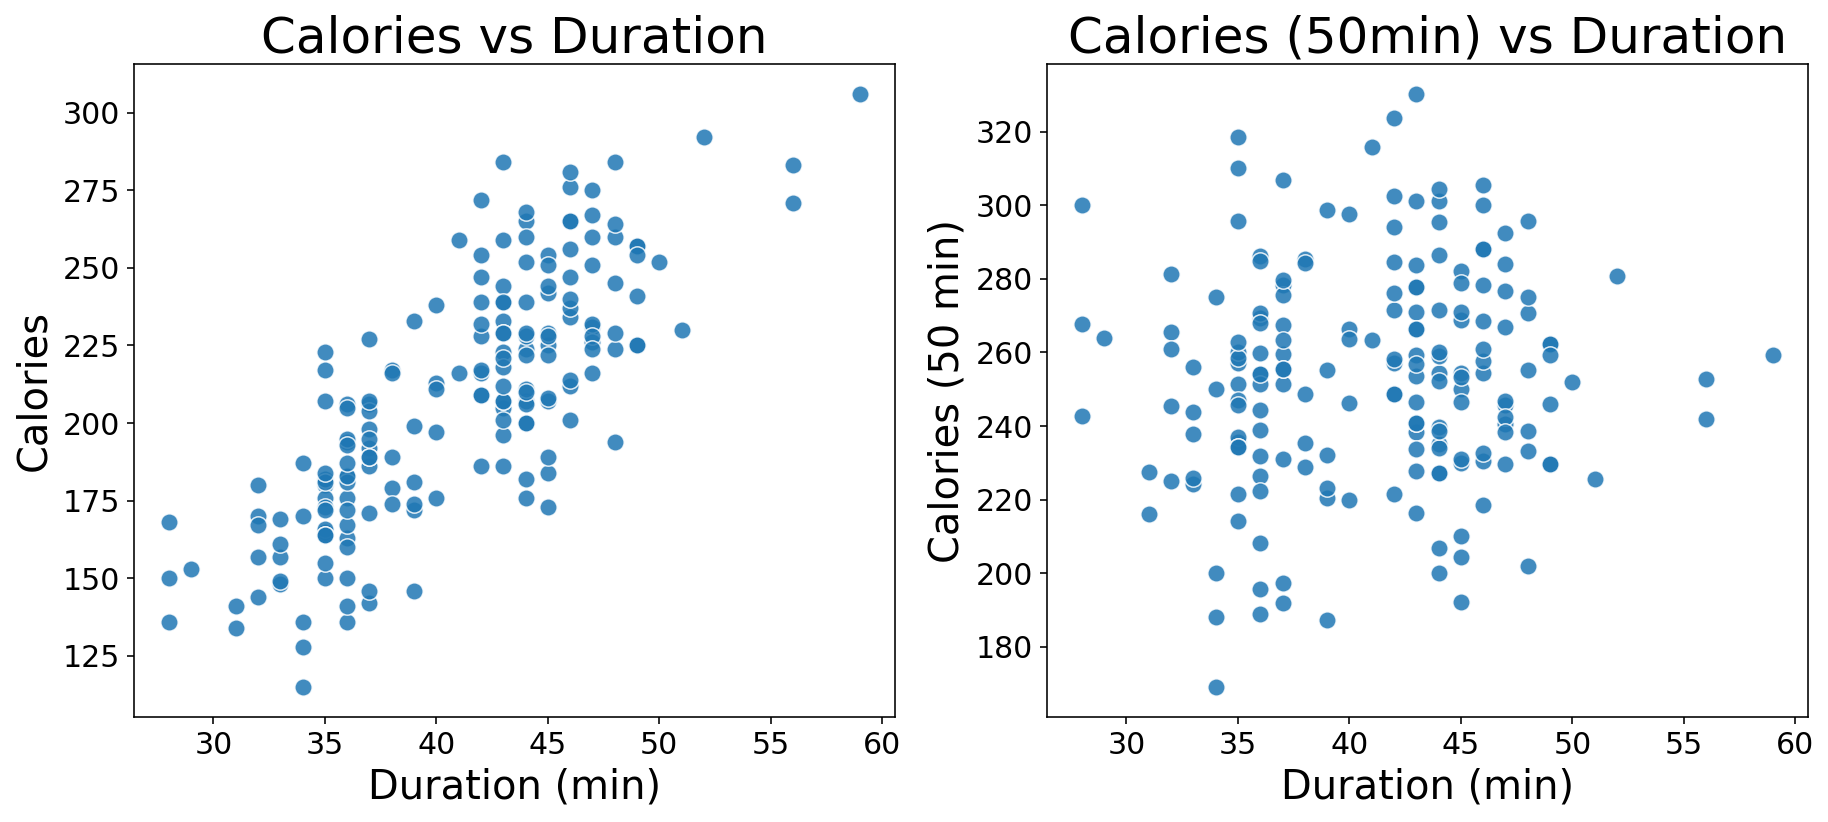

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# left plot
plt.subplot(1,2,1)
sns.scatterplot(x='Duration', y="Calories_Active", 
                s=75, alpha=0.85, data=df)
plt.title('Calories vs Duration', fontsize=25)
plt.xlabel('Duration (min)', fontsize=20, rotation=0)
plt.ylabel('Calories', fontsize=20, rotation=90)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0);
# right plot
plt.subplot(1,2,2)
sns.scatterplot(x='Duration', y="Calories_Active_50min", 
                s=75, alpha=0.85, data=df)
plt.title('Calories (50min) vs Duration', fontsize=25)
plt.xlabel('Duration (min)', fontsize=20, rotation=0)
plt.ylabel('Calories (50 min)', fontsize=20, rotation=90)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0);

In [200]:
# correlation coefficient of calories with duration
cc = scipy.stats.pearsonr(df['Duration'], df['Calories_Active'])[0]
cc_norm = scipy.stats.pearsonr(df['Duration'], df['Calories_Active_50min'])[0]
print('Correlation with workout duration is reduced from %.2f to %.2f.' % (cc, cc_norm))

Correlation with workout duration is reduced from 0.79 to 0.09.


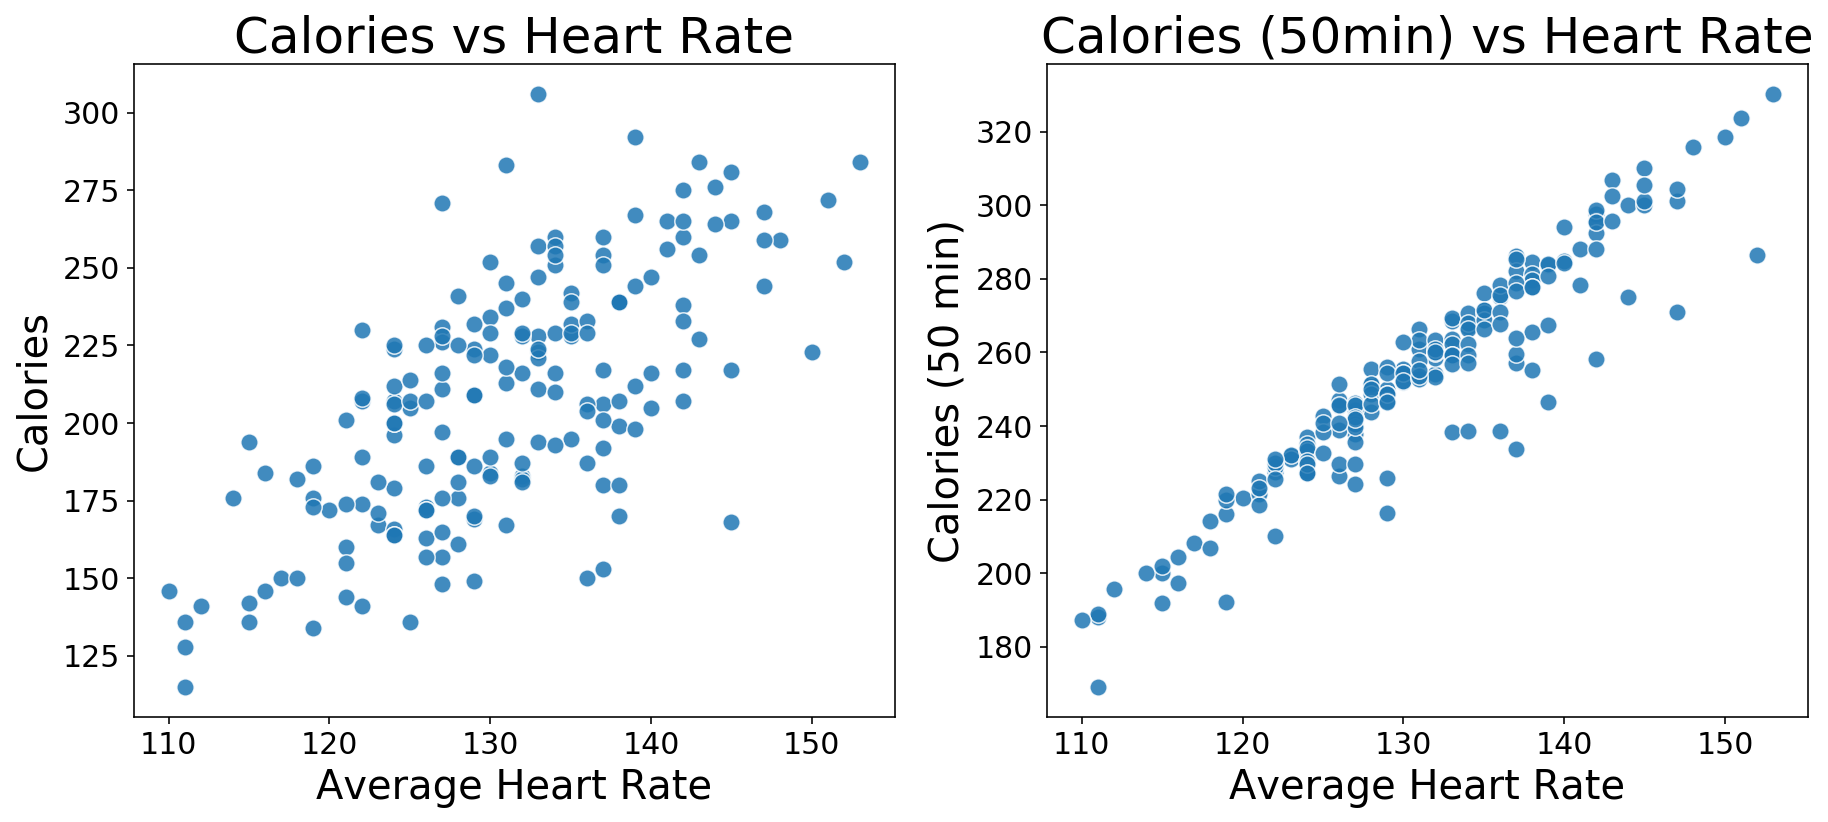

In [201]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# left plot
plt.subplot(1,2,1)
sns.scatterplot(x='Heart_Rate_Avg', y="Calories_Active", 
                s=75, alpha=0.85, data=df)
plt.title('Calories vs Heart Rate', fontsize=25)
plt.xlabel('Average Heart Rate', fontsize=20, rotation=0)
plt.ylabel('Calories', fontsize=20, rotation=90)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0);
# right plot
plt.subplot(1,2,2)
sns.scatterplot(x='Heart_Rate_Avg', y="Calories_Active_50min", 
                s=75, alpha=0.85, data=df)
plt.title('Calories (50min) vs Heart Rate', fontsize=25)
plt.xlabel('Average Heart Rate', fontsize=20, rotation=0)
plt.ylabel('Calories (50 min)', fontsize=20, rotation=90)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0);

In [202]:
# correlation coefficient of calories with duration
cc = scipy.stats.pearsonr(df['Heart_Rate_Avg'], df['Calories_Active'])[0]
cc_norm = scipy.stats.pearsonr(df['Heart_Rate_Avg'], df['Calories_Active_50min'])[0]
print('Correlation with average heart rate is increased from %.2f to %.2f.' % (cc, cc_norm))

Correlation with average heart rate is increased from 0.67 to 0.94.


**Conclusion**: Average heart rate is highly positively correlated with calories burn. The higher average heart rate, the higher calories burned.  

### Which type of workout is more effective, weights, bands, or body weight?

Due to limitation of equipments, home workouts commonly use weights (dumbells), bands, and body weight. Which one is more effective in calorie burn? Let's check on the distribution of normalized calories among the three class types. [Boxplot](https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots) is a helpful visualization for this need.

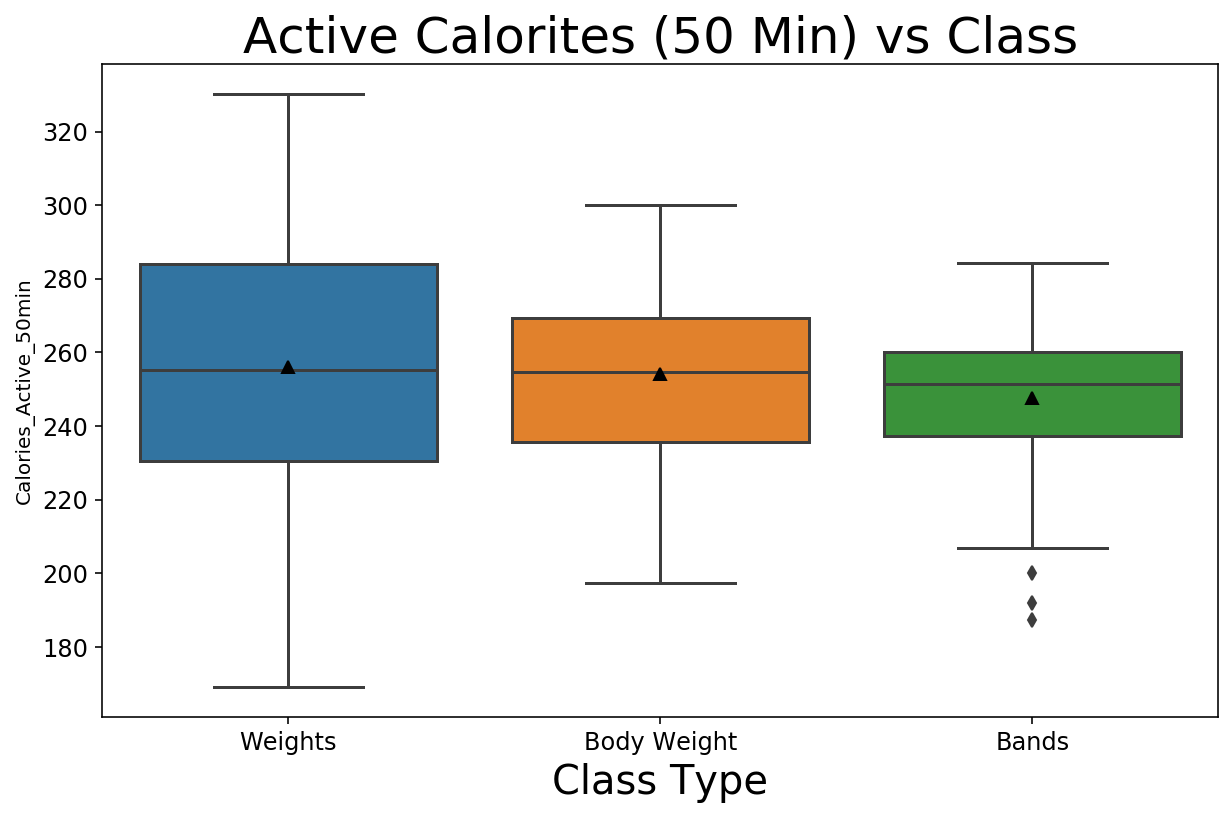

In [235]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="ClassType", 
                 y="Calories_Active_50min", 
                 showmeans=True, 
                 meanprops={"markerfacecolor":"black", "markeredgecolor":"black"},
                 data=df)
plt.title('Active Calorites (50 Min) vs Class', fontsize=25)
plt.xlabel('Class Type', fontsize=20, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.show()

Except the wider range of varition of weights class, don't observe difference in averaged calories (black triangle). Let's take a look of the exact averaged calories in each class type.

In [228]:
# average normalized calories in each class type
avg_type = df.groupby('ClassType')['Calories_Active_50min'] \
                .agg({'mean'}).reset_index() \
                .rename(columns={'ClassType': 'class type', 'mean': 'average calories'})
avg_type['average calories'] = avg_type['average calories'].astype(int)
avg_type.sort_values(by='average calories', ascending=False)

,class type,average calories
2,Weights,256
1,Body Weight,254
0,Bands,247


Very similar averaged calories burns among the three class types. Let's perform statistical test to see if the difference in average calaories is significant. As there are multiple sample groups, multi-sample ANOVA is used. If the p_value is bigger than 0.05, then statistically the difference of averaged calories burn is not significant.

In [238]:
p_value = stats.kruskal(df.loc[df['ClassType']=='Weights', 'Calories_Active_50min'], \
              df.loc[df['ClassType']=='Body Weight', 'Calories_Active_50min'], \
              df.loc[df['ClassType']=='Bands', 'Calories_Active_50min'])[1]
p_value

0.30345261399876033

**Conclusion**: Weights, bands, and body weight workouts are all effective in calorie burn, no statistical difference observed. 

### Does full-body workout burn more calories compared with body part focused workout?

In [ ]:
# total body vs regional focused
df['Focus'] = 'body-part'
df.loc[df['Class'].str.find('Body')!=-1, 'Focus'] = 'full-body'

In [27]:
df_output = df.groupby('Class').agg({'Calories_Active_50min': 'median'}).reset_index()
df_output = df_output.sort_values('Calories_Active_50min', ascending=False)
df_output

,Class,Calories_Active_50min
3,Full Body (Lower Focus),263.90
5,Total Body,262.55
4,Full Body (Upper Focus),251.40
0,Abs & Ass,246.35
1,Arms & Abs,240.40
2,"Chest, Back & Abs",234.30


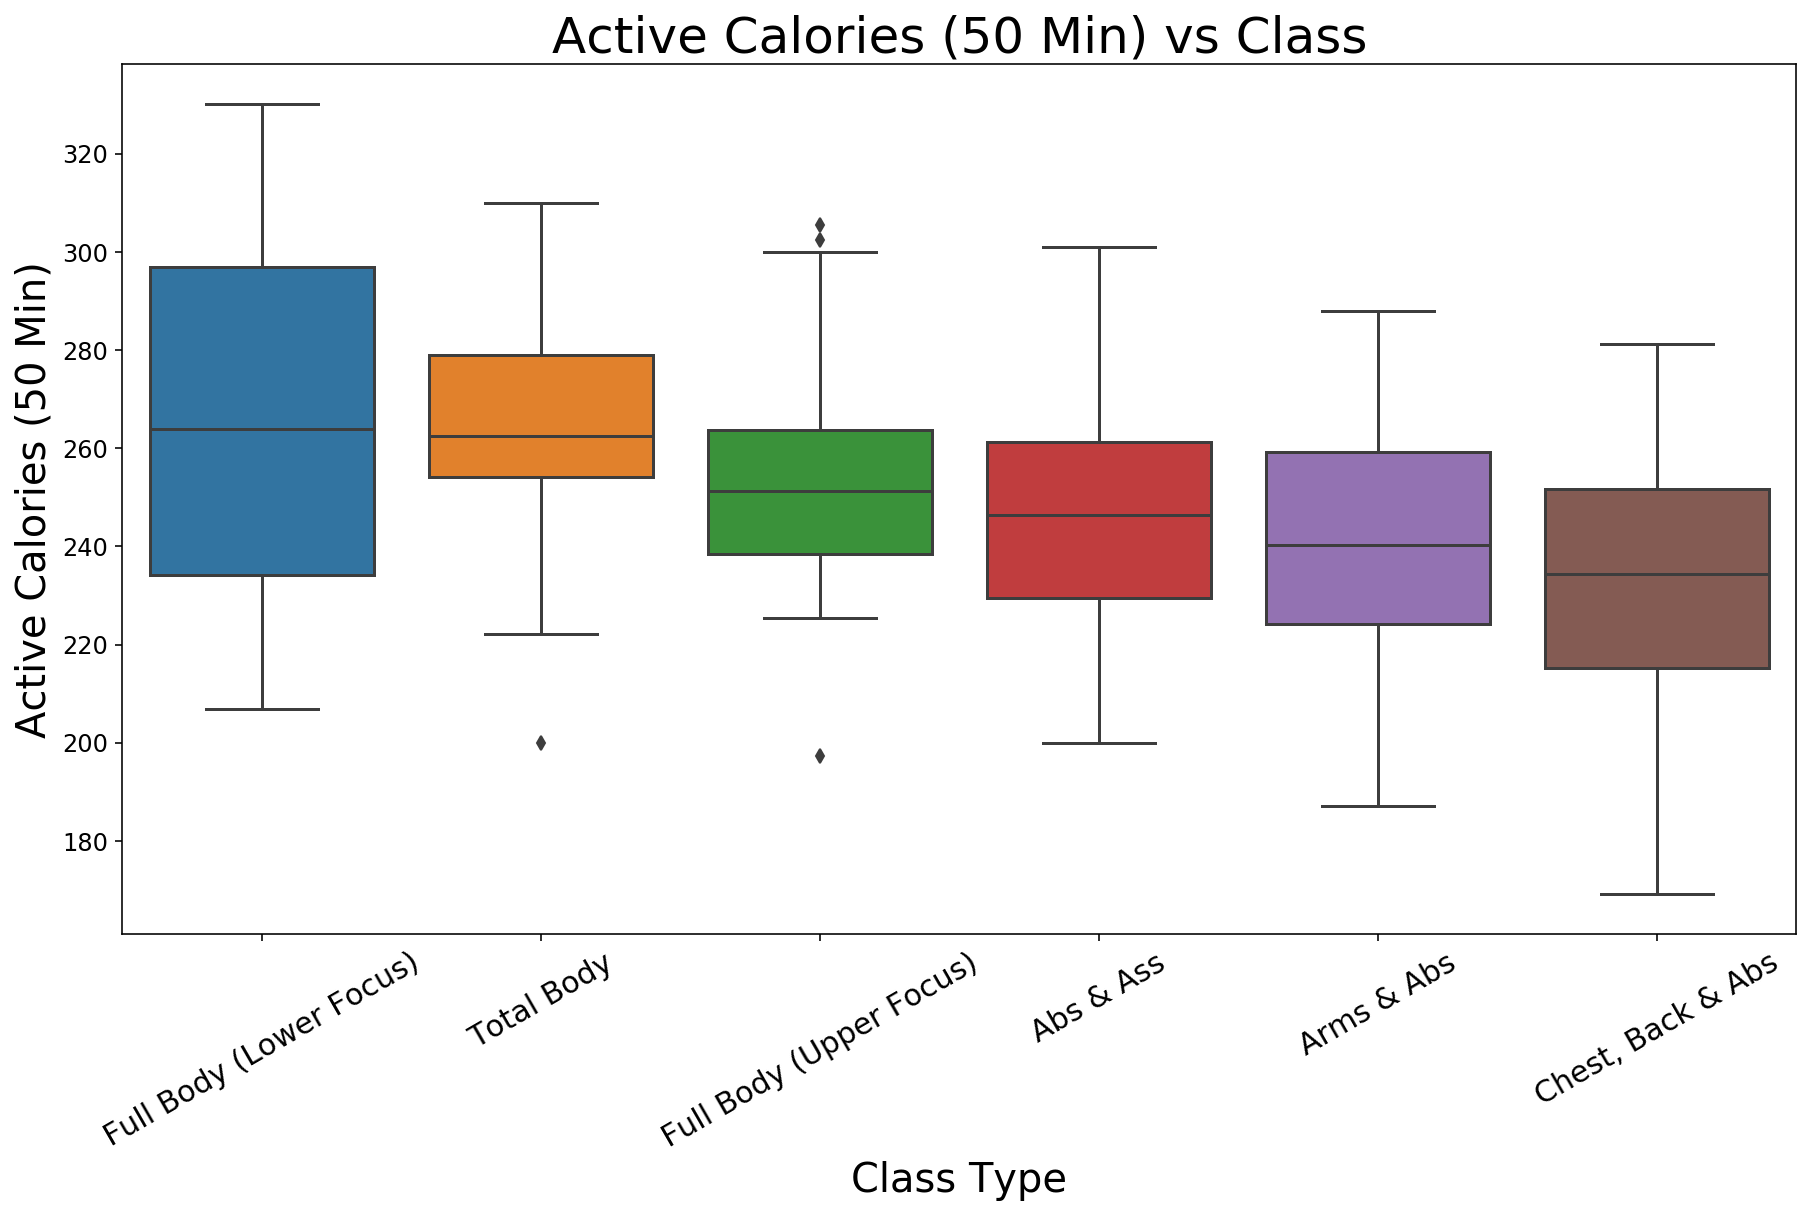

In [28]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Class", 
                 y="Calories_Active_50min", 
                 order=list(df_output['Class']),
                 data=df)
plt.title('Active Calories (50 Min) vs Class', fontsize=25)
plt.xlabel('Class Type', fontsize=20, rotation=0)
plt.ylabel('Active Calories (50 Min)', fontsize=20, rotation=90)
plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=12, rotation=0)
plt.show()

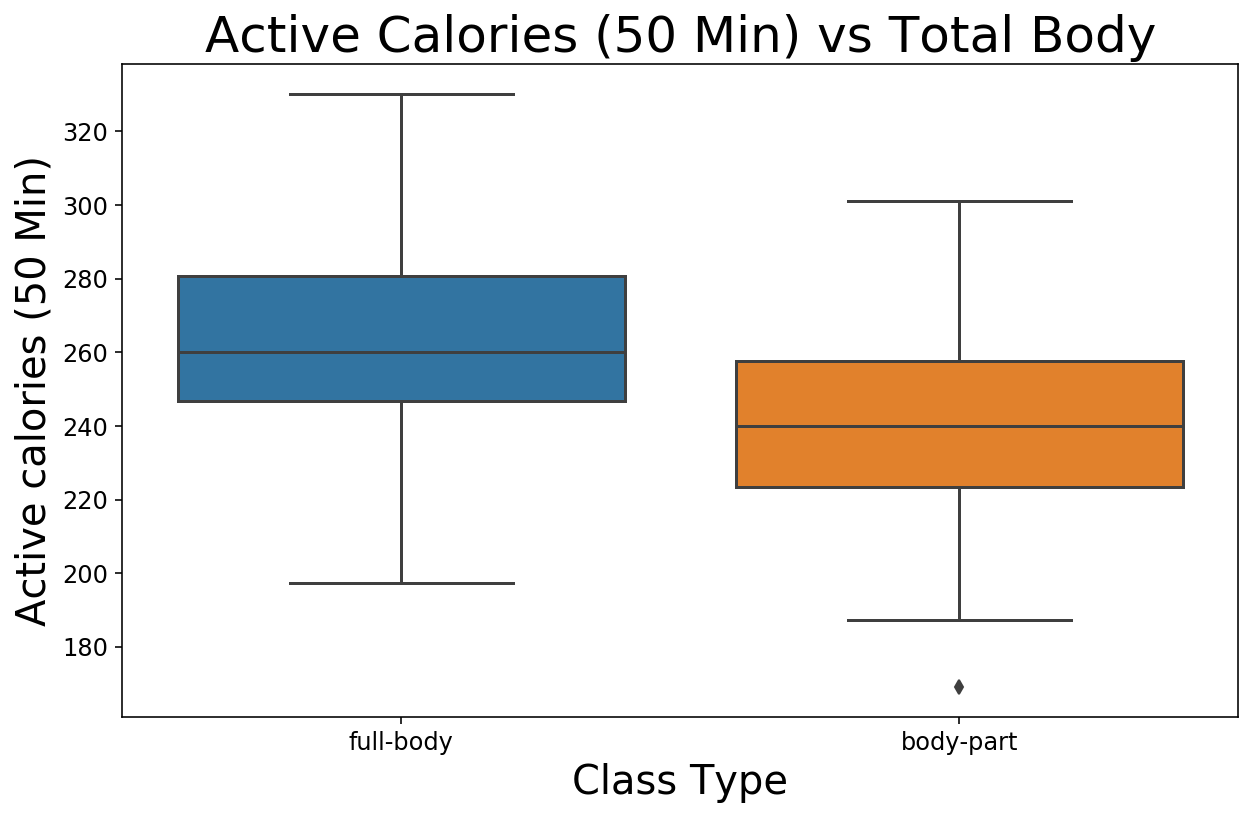

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="Focus", 
                 y="Calories_Active_50min", 
                 order = ['full-body', 'body-part'],
                 data=df)
plt.title('Active Calories (50 Min) vs Total Body', fontsize=25)
plt.xlabel('Class Type', fontsize=20, rotation=0)
plt.ylabel('Active calories (50 Min)', fontsize=20, rotation=90)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.show()

In [36]:
# U-test
_, p_value = stats.mannwhitneyu(
                x = df.loc[df['Focus'] == 'full-body', 'Calories_Active_50min'],
                y = df.loc[df['Focus'] != 'full-body', 'Calories_Active_50min'],
                use_continuity = False,
                alternative = 'two-sided')
print('P-value for U-test: {}'.format(round(p_value,3)))

# T-test
_, p_value = stats.ttest_ind(a=df.loc[df['Focus']=='full-body', 'Calories_Active_50min'], 
               b=df.loc[df['Focus']!='full-body', 'Calories_Active_50min'], 
               axis=0, equal_var=False, nan_policy='propagate')
print('P-value for T-test: {}'.format(round(p_value,2)))

P-value for U-test: 0.0
P-value for T-test: 0.0


### Display heart rate

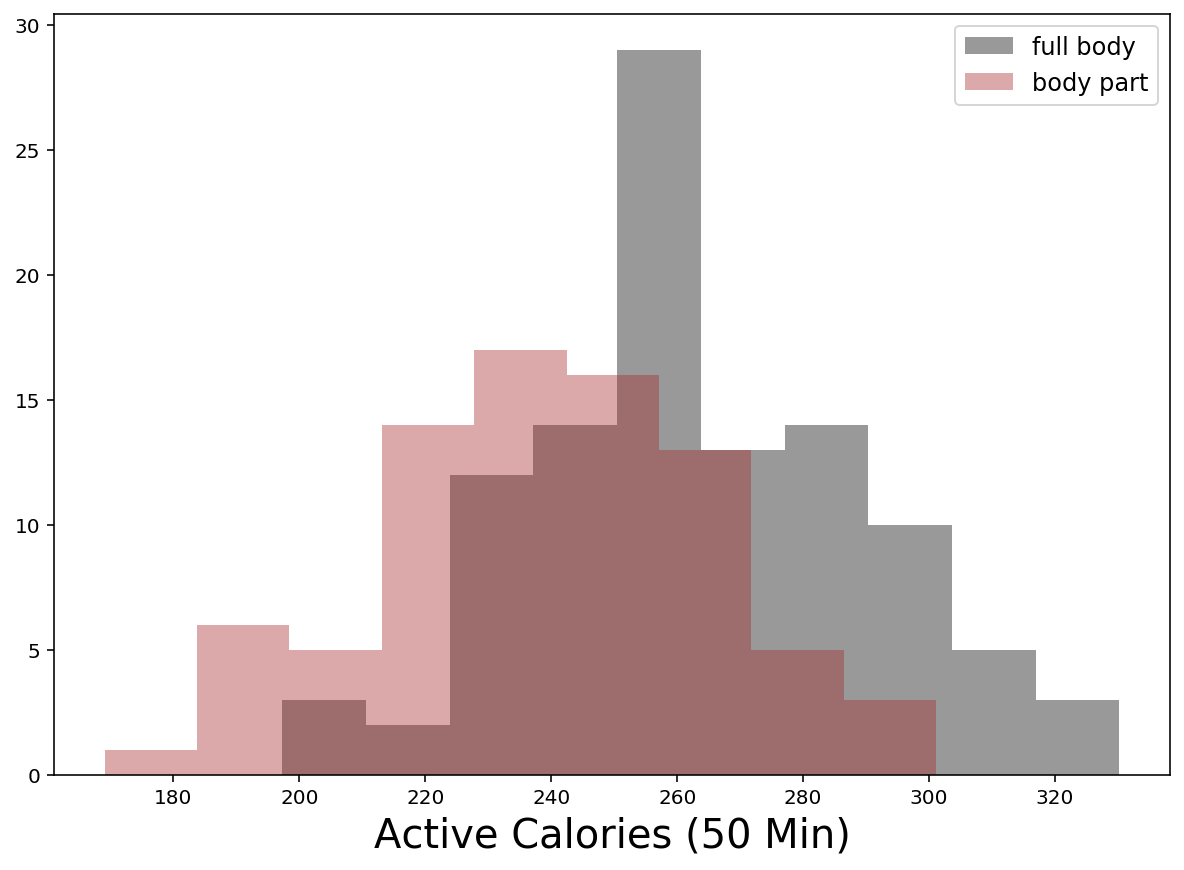

In [30]:
fig = plt.figure(figsize=(10,7))
ax = sns.distplot(df.loc[df['Focus']=='full-body', 'Calories_Active_50min'], kde=False, color='black', label="full body");
ax = sns.distplot(df.loc[df['Focus']!='full-body', 'Calories_Active_50min'], kde=False, color='brown', label="body part");
ax.legend(loc='best', fontsize=12)
plt.xlabel('Active Calories (50 Min)', fontsize=20, rotation=0)
vals = ax.get_yticks()